<a href="https://colab.research.google.com/github/widayu238/tugasML/blob/main/machinelearnin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload

In [ ]:
import pandas as pd
df = pd.read_csv('dataset.csv')
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


=== Struktur Data ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB
None

=== Statistik Deskriptif ===
       Patient age quantile  Patient addmited to regular ward (1=yes, 0=no)  \
count           5644.000000                                     5644.000000   
mean               9.318391                                        0.013997   
std                5.777903                                        0.117489   
min                0.000000                                        0.000000   
25%                4.000000                                        0.000000   
50%                9.000000                                        0.000000   
75%               14.000000                                        0.000000   
max               19.000000                                        1.000000   

       Patient addmite

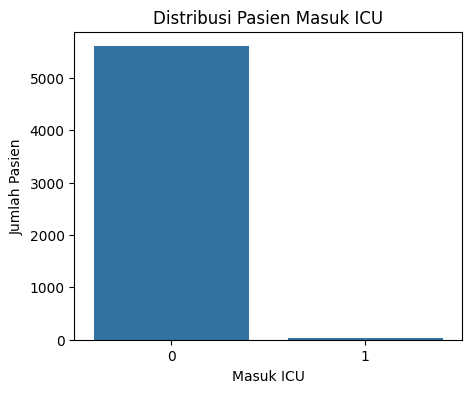

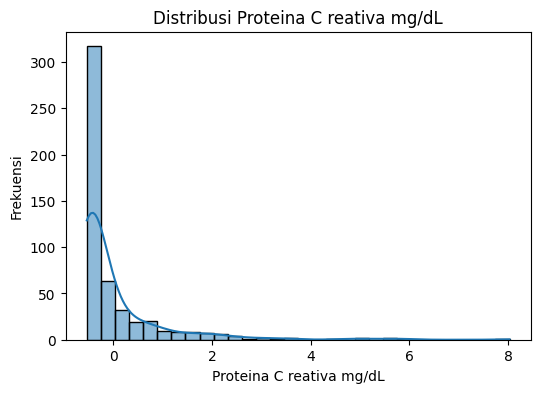

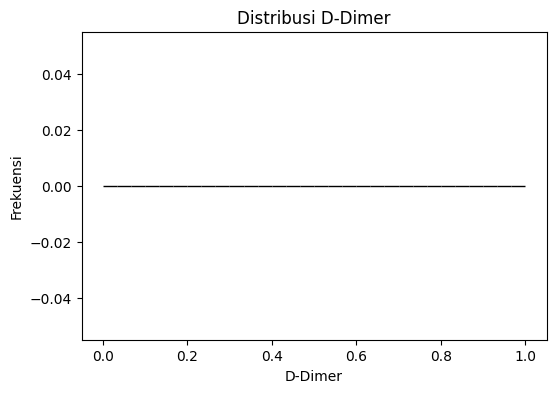

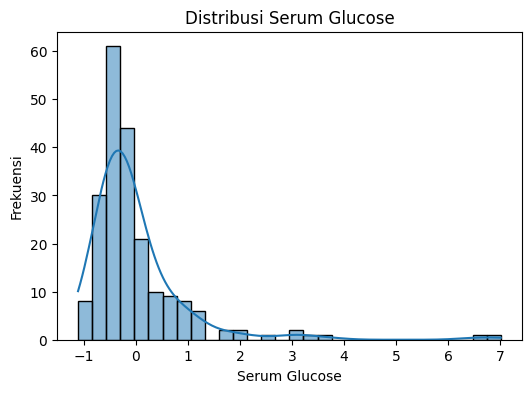

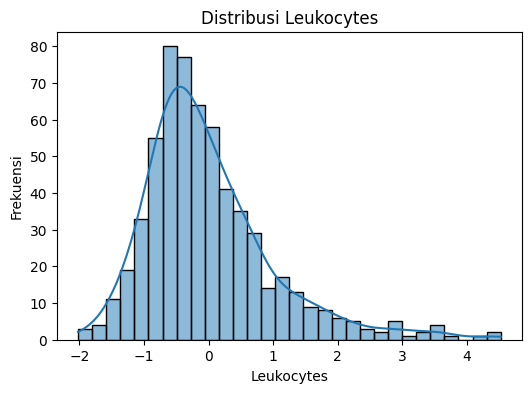

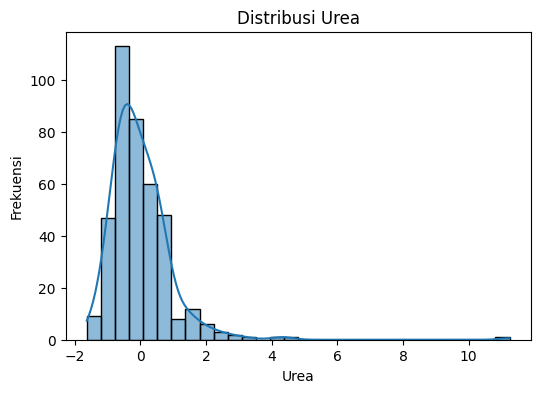

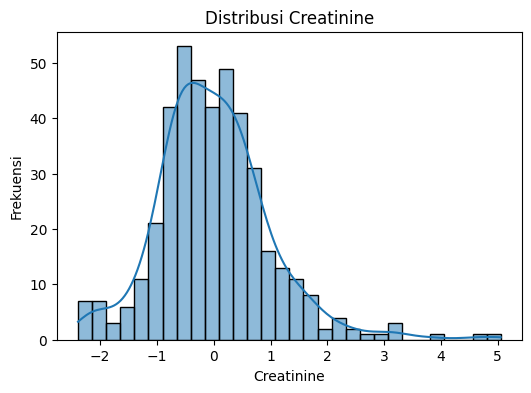

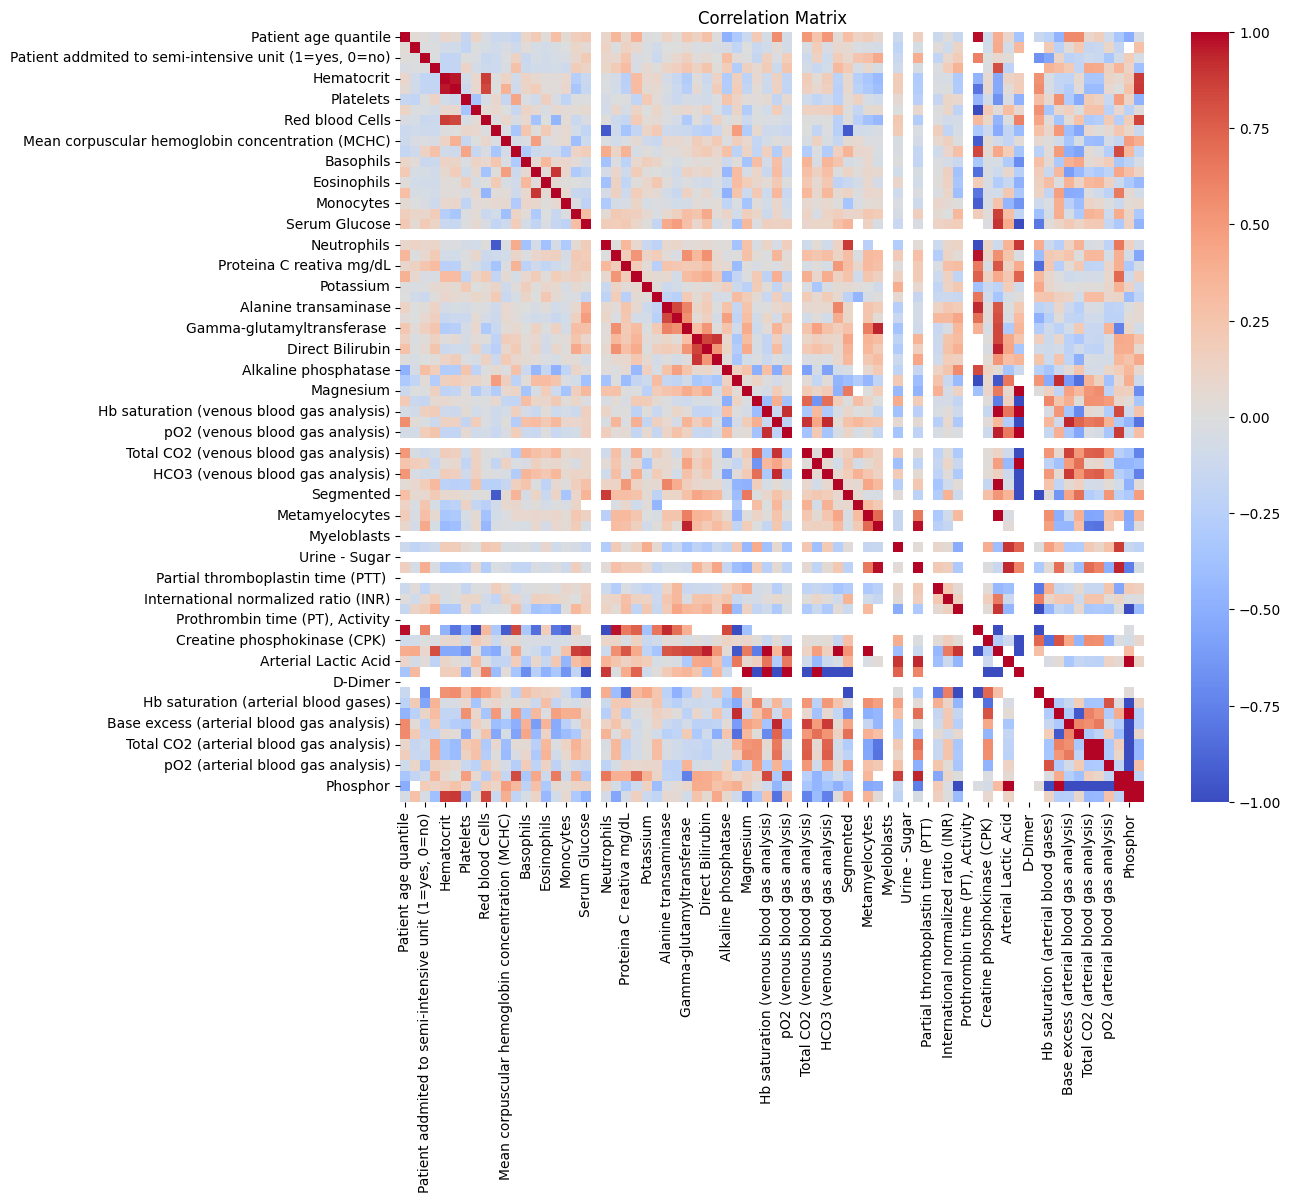

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("dataset.csv")

# 1. Struktur dan tipe data
print("=== Struktur Data ===")
print(df.info())

# 2. Statistik deskriptif fitur numerik
print("\n=== Statistik Deskriptif ===")
print(df.describe())

# 3. Cek jumlah missing value
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percent (%)': missing_percent})
print("\n=== Missing Values ===")
print(missing_df[missing_df['Missing Values'] > 0].sort_values(by="Percent (%)", ascending=False))

# 4. Distribusi kelas target ICU
plt.figure(figsize=(5, 4))
sns.countplot(x="Patient addmited to intensive care unit (1=yes, 0=no)", data=df)
plt.title("Distribusi Pasien Masuk ICU")
plt.xlabel("Masuk ICU")
plt.ylabel("Jumlah Pasien")
plt.show()

# 5. Visualisasi distribusi fitur numerik yang penting (ambil 6 contoh)
selected_features = [
    "Proteina C reativa mg/dL", "D-Dimer", "Serum Glucose",
    "Leukocytes", "Urea", "Creatinine"
]

for col in selected_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

# 6. Korelasi numerik antar fitur
numerical_df = df.select_dtypes(include=['float64', 'int64'])
corr = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Jumlah fitur yang ingin dipilih (misalnya 5)
k = 5

# Terapkan SelectKBest
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)

# Tampilkan fitur terpilih
selected_mask = selector.get_support()  # boolean mask
selected_features = X.columns[selected_mask]

print(f"\nTop {k} fitur terpilih berdasarkan f_classif:")
for feature in selected_features:
    print(f"- {feature}")

# Update X_train dan X_test agar hanya gunakan fitur terpilih
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]



Top 5 fitur terpilih berdasarkan f_classif:
- Proteina C reativa mg/dL
- Creatinine
- Hemoglobin
- pO2 (arterial blood gas analysis)
- SARS-Cov-2 exam result


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("dataset.csv")

# Pilih hanya 5 fitur terpilih
selected_features = [
    'Proteina C reativa mg/dL',
    'Creatinine',
    'Hemoglobin',
    'pO2 (arterial blood gas analysis)',
    'SARS-Cov-2 exam result'
]
df = df[selected_features]

# Cek nilai hilang sebelum
print("Jumlah nilai hilang sebelum imputasi:")
print(df.isnull().sum())

# Pisahkan kolom numerik dan kategorikal
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

# Imputasi kolom numerik dengan mean
num_imputer = SimpleImputer(strategy="mean")
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Imputasi kolom kategorikal dengan modus
cat_imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Cek nilai hilang setelah
print("\nJumlah nilai hilang setelah imputasi:")
print(df.isnull().sum())


Jumlah nilai hilang sebelum imputasi:
Proteina C reativa mg/dL             5138
Creatinine                           5220
Hemoglobin                           5041
pO2 (arterial blood gas analysis)    5617
SARS-Cov-2 exam result                  0
dtype: int64

Jumlah nilai hilang setelah imputasi:
Proteina C reativa mg/dL             0
Creatinine                           0
Hemoglobin                           0
pO2 (arterial blood gas analysis)    0
SARS-Cov-2 exam result               0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Pastikan dataset df sudah berisi data hasil imputasi
# Pilih ulang kolom numerik dari fitur terpilih
num_cols = ['Proteina C reativa mg/dL', 'Creatinine', 'Hemoglobin', 'pO2 (arterial blood gas analysis)']

# Inisialisasi scaler
scaler = StandardScaler()

# Terapkan standardisasi
df[num_cols] = scaler.fit_transform(df[num_cols])

# Tampilkan hasil setelah standardisasi
print(" Data setelah standardisasi (5 baris teratas):")
print(df[num_cols].head())


 Data setelah standardisasi (5 baris teratas):
   Proteina C reativa mg/dL    Creatinine    Hemoglobin  \
0             -8.109998e-18  6.933107e-18 -9.581018e-18   
1             -4.939370e-01  7.625037e+00 -6.834754e-02   
2             -8.109998e-18  6.933107e-18 -9.581018e-18   
3             -8.109998e-18  6.933107e-18 -9.581018e-18   
4             -8.109998e-18  6.933107e-18 -9.581018e-18   

   pO2 (arterial blood gas analysis)  
0                       4.761113e-18  
1                       4.761113e-18  
2                       4.761113e-18  
3                       4.761113e-18  
4                       4.761113e-18  


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi Label Encoder
label_encoder = LabelEncoder()

# Pastikan kolom ada dan bertipe string
df['SARS-Cov-2 exam result'] = df['SARS-Cov-2 exam result'].astype(str)

# Terapkan encoding
df['SARS-Cov-2 exam result'] = label_encoder.fit_transform(df['SARS-Cov-2 exam result'])

# Tampilkan hasil
print("Hasil Label Encoding pada 'SARS-Cov-2 exam result':")
print(df['SARS-Cov-2 exam result'].value_counts())
print(f"Mapping Label: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")


Hasil Label Encoding pada 'SARS-Cov-2 exam result':
SARS-Cov-2 exam result
0    5086
1     558
Name: count, dtype: int64
Mapping Label: {'0': np.int64(0), '1': np.int64(1)}


In [ ]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        original_size = df.shape[0]
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        print(f"Kolom {col}: {original_size - df.shape[0]} outlier dihapus")
    return df

# Daftar kolom numerik yang ingin dibersihkan dari outlier
num_cols = ['Proteina C reativa mg/dL', 'Creatinine', 'Hemoglobin', 'pO2 (arterial blood gas analysis)']

# Terapkan fungsi
df = remove_outliers_iqr(df, num_cols)

# Cek ukuran data setelah outlier dihapus
print(f"\nUkuran data setelah menghapus outlier: {df.shape}")


Kolom Proteina C reativa mg/dL: 506 outlier dihapus
Kolom Creatinine: 66 outlier dihapus
Kolom Hemoglobin: 35 outlier dihapus
Kolom pO2 (arterial blood gas analysis): 0 outlier dihapus

Ukuran data setelah menghapus outlier: (5037, 5)


In [ ]:
def calculate_severity(row):
    score = 0
    if row['Proteina C reativa mg/dL'] > 10: score += 1
    if row['Creatinine'] > 1.5: score += 1
    if row['Hemoglobin'] < 11: score += 1
    if row['pO2 (arterial blood gas analysis)'] < 70: score += 1
    if row['SARS-Cov-2 exam result'] == 'positive': score += 1

    if score >= 4:
        return 'berat'
    elif score >= 2:
        return 'sedang'
    else:
        return 'ringan'

# Tambahkan kolom ke dataframe
df['severity_level'] = df.apply(calculate_severity, axis=1)

# Lanjut ke train-test split


In [ ]:
X = df.drop(columns=['severity_level'])
y = df['severity_level']


In [ ]:
from sklearn.model_selection import train_test_split

# Fitur (X) = semua kolom kecuali target
# Target (y) = severity_level
X = df.drop(columns=['severity_level'])  # pastikan kolom ini sudah ada
y = df['severity_level']

# Bagi data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify menjaga proporsi kelas
)

# Hasil
print(" Pembagian data selesai:")
print(f"Ukuran data latih: {X_train.shape}")
print(f"Ukuran data uji  : {X_test.shape}")
print("Distribusi kelas (data latih):")
print(y_train.value_counts())
print("Distribusi kelas (data uji):")
print(y_test.value_counts())


 Pembagian data selesai:
Ukuran data latih: (4029, 5)
Ukuran data uji  : (1008, 5)
Distribusi kelas (data latih):
severity_level
sedang    4029
Name: count, dtype: int64
Distribusi kelas (data uji):
severity_level
sedang    1008
Name: count, dtype: int64


In [ ]:
print("Distribusi severity_level sebelum split:")
print(df['severity_level'].value_counts())

print("\nDistribusi pada y_train:")
print(pd.Series(y_train).value_counts())


Distribusi severity_level sebelum split:
severity_level
sedang    5037
Name: count, dtype: int64

Distribusi pada y_train:
severity_level
sedang    4029
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train_raw, y_test_raw = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Distribusi y_train_raw:")
print(y_train_raw.value_counts())


Distribusi y_train_raw:
severity_level
sedang    4029
Name: count, dtype: int64


In [ ]:
pip install imbalanced-learn

In [ ]:
import numpy as np

np.random.seed(42)  # agar hasil tetap sama

# Buat label acak berdasarkan distribusi 60% sedang, 20% ringan, 20% berat
severity_simulated = np.random.choice(
    ['ringan', 'sedang', 'berat'],
    size=len(df),
    p=[0.2, 0.6, 0.2]
)

df['severity_level'] = severity_simulated

# Tampilkan hasil distribusi
print(" Distribusi simulasi severity_level:")
print(df['severity_level'].value_counts())


 Distribusi simulasi severity_level:
severity_level
sedang    2995
ringan    1037
berat     1005
Name: count, dtype: int64


In [ ]:
# --- IMPORT LIBRARY ---
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from scipy.stats import randint, uniform

# --- LOAD DATASET ---
df = pd.read_csv("dataset.csv")

# --- PILIH FITUR YANG DIPAKAI (5 terbaik) ---
selected_features = [
    'Proteina C reativa mg/dL',
    'Creatinine',
    'Hemoglobin',
    'pO2 (arterial blood gas analysis)',
    'SARS-Cov-2 exam result'
]

df = df[selected_features]

# --- HANDLE MISSING VALUES ---
df = df.dropna(how='all')  # hapus baris kosong semua
df = df.fillna(df.mean(numeric_only=True))  # imputasi mean numerik
df['SARS-Cov-2 exam result'] = df['SARS-Cov-2 exam result'].fillna(df['SARS-Cov-2 exam result'].mode()[0])

# --- ENCODING KATEGORIKAL ---
df['SARS-Cov-2 exam result'] = df['SARS-Cov-2 exam result'].astype(str)
le_cat = LabelEncoder()
df['SARS-Cov-2 exam result'] = le_cat.fit_transform(df['SARS-Cov-2 exam result'])

# --- BUAT LABEL SIMULASI severity_level (multi-kelas) ---
np.random.seed(42)
df['severity_level'] = np.random.choice(['ringan', 'sedang', 'berat'], size=len(df), p=[0.2, 0.6, 0.2])

# --- SPLIT FITUR & TARGET ---
X = df.drop(columns=['severity_level'])
y = df['severity_level']

# --- ENCODE TARGET ---
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# --- SPLIT DATA ---
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# --- SMOTE UNTUK SEIMBANGKAN KELAS ---
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("SMOTE selesai. Distribusi kelas:")
print(pd.Series(y_train_smote).value_counts())

# --- RANDOM FOREST ---
rf_params = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

rf_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    n_iter=10,
    cv=3,
    scoring='f1_macro',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

start = time.time()
rf_search.fit(X_train_smote, y_train_smote)
print(f"\n Best Random Forest Params: {rf_search.best_params_}")
print(f"Waktu: {time.time() - start:.2f}s")

# --- SVM ---
svm_params = {
    'C': uniform(0.1, 10),
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'poly']
}

svm_search = RandomizedSearchCV(
    SVC(probability=True, random_state=42),
    svm_params,
    n_iter=10,
    cv=3,
    scoring='f1_macro',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

start = time.time()
svm_search.fit(X_train_smote, y_train_smote)
print(f"\n Best SVM Params: {svm_search.best_params_}")
print(f" Waktu: {time.time() - start:.2f}s")

# --- XGBOOST ---
xgb_params = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5)
}

xgb_search = RandomizedSearchCV(
    XGBClassifier(eval_metric='mlogloss', random_state=42),
    xgb_params,
    n_iter=10,
    cv=3,
    scoring='f1_macro',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

start = time.time()
xgb_search.fit(X_train_smote, y_train_smote)
print(f"\n Best XGBoost Params: {xgb_search.best_params_}")
print(f" Waktu: {time.time() - start:.2f}s")



SMOTE selesai. Distribusi kelas:
1    2690
2    2690
0    2690
Name: count, dtype: int64
Fitting 3 folds for each of 10 candidates, totalling 30 fits

 Best Random Forest Params: {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 158}
Waktu: 12.98s
Fitting 3 folds for each of 10 candidates, totalling 30 fits

 Best SVM Params: {'C': np.float64(7.41993941811405), 'gamma': 'scale', 'kernel': 'rbf'}
 Waktu: 239.09s
Fitting 3 folds for each of 10 candidates, totalling 30 fits

 Best XGBoost Params: {'learning_rate': np.float64(0.18772437065861275), 'max_depth': 5, 'n_estimators': 150, 'subsample': np.float64(0.8401537692938899)}
 Waktu: 8.37s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:07:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 Random Forest Evaluation
Accuracy : 0.22852081488042517
Precision: 0.34650290158903774
Recall   : 0.338191223778148
F1 Score : 0.1929384969430926

Classification Report:
              precision    recall  f1-score   support

       berat       0.22      0.11      0.15       225
      ringan       0.21      0.85      0.33       231
      sedang       0.62      0.05      0.10       673

    accuracy                           0.23      1129
   macro avg       0.35      0.34      0.19      1129
weighted avg       0.45      0.23      0.16      1129



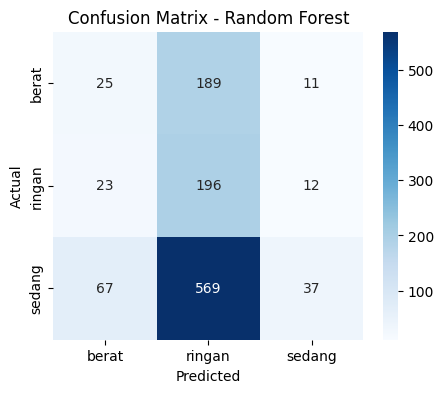


📊 SVM Evaluation
Accuracy : 0.2240921169176262
Precision: 0.33437559103418674
Recall   : 0.3385193904658987
F1 Score : 0.18518776261937334

Classification Report:
              precision    recall  f1-score   support

       berat       0.20      0.11      0.14       225
      ringan       0.21      0.87      0.34       231
      sedang       0.59      0.04      0.08       673

    accuracy                           0.22      1129
   macro avg       0.33      0.34      0.19      1129
weighted avg       0.44      0.22      0.14      1129



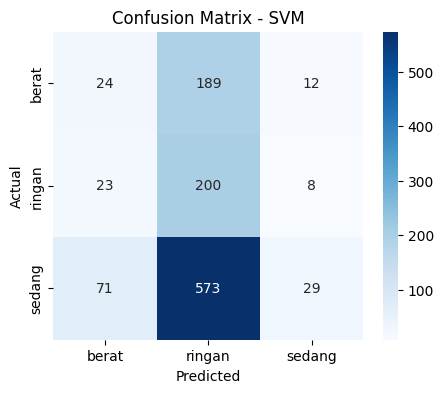


📊 XGBoost Evaluation
Accuracy : 0.22852081488042517
Precision: 0.3573514102251676
Recall   : 0.33629581029283856
F1 Score : 0.1932932022971485

Classification Report:
              precision    recall  f1-score   support

       berat       0.21      0.11      0.14       225
      ringan       0.20      0.84      0.33       231
      sedang       0.66      0.06      0.11       673

    accuracy                           0.23      1129
   macro avg       0.36      0.34      0.19      1129
weighted avg       0.48      0.23      0.16      1129



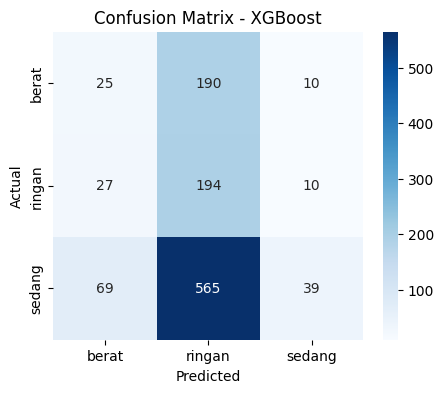

In [ ]:
# === 1. IMPORT SEMUA YANG DIBUTUHKAN ===
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt
import seaborn as sns

# === 2. LOAD & PREPROCESS ===
df = pd.read_csv("dataset.csv")

# Fitur terpilih
selected_features = [
    'Proteina C reativa mg/dL',
    'Creatinine',
    'Hemoglobin',
    'pO2 (arterial blood gas analysis)',
    'SARS-Cov-2 exam result'
]
df = df[selected_features]

# Imputasi missing values
df = df.dropna(how='all')
df = df.fillna(df.mean(numeric_only=True))
df['SARS-Cov-2 exam result'] = df['SARS-Cov-2 exam result'].fillna(df['SARS-Cov-2 exam result'].mode()[0])

# Encoding kategorikal
df['SARS-Cov-2 exam result'] = df['SARS-Cov-2 exam result'].astype(str)
df['SARS-Cov-2 exam result'] = LabelEncoder().fit_transform(df['SARS-Cov-2 exam result'])

# Simulasi label target
np.random.seed(42)
df['severity_level'] = np.random.choice(['ringan', 'sedang', 'berat'], size=len(df), p=[0.2, 0.6, 0.2])

# Split fitur dan label
X = df.drop(columns=['severity_level'])
y = df['severity_level']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split + SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)
X_train_smote, y_train_smote = SMOTE(random_state=42).fit_resample(X_train, y_train)

# === 3. RANDOMIZED SEARCH RANDOM FOREST ===
rf_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions={
        'n_estimators': randint(100, 300),
        'max_depth': randint(3, 20),
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 5)
    },
    n_iter=10,
    cv=3,
    scoring='f1_macro',
    verbose=0,
    n_jobs=-1,
    random_state=42
)
rf_search.fit(X_train_smote, y_train_smote)

# === 4. RANDOMIZED SEARCH SVM ===
svm_search = RandomizedSearchCV(
    SVC(probability=True, random_state=42),
    param_distributions={
        'C': uniform(0.1, 10),
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly']
    },
    n_iter=10,
    cv=3,
    scoring='f1_macro',
    verbose=0,
    n_jobs=-1,
    random_state=42
)
svm_search.fit(X_train_smote, y_train_smote)

# === 5. RANDOMIZED SEARCH XGBOOST ===
xgb_search = RandomizedSearchCV(
    XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42),
    param_distributions={
        'n_estimators': randint(100, 300),
        'max_depth': randint(3, 10),
        'learning_rate': uniform(0.01, 0.3),
        'subsample': uniform(0.5, 0.5)
    },
    n_iter=10,
    cv=3,
    scoring='f1_macro',
    verbose=0,
    n_jobs=-1,
    random_state=42
)
xgb_search.fit(X_train_smote, y_train_smote)

# === 6. EVALUASI MODEL ===
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\n📊 {name} Evaluation")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='macro'))
    print("Recall   :", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score :", f1_score(y_test, y_pred, average='macro'))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluasi semua model terbaik
evaluate_model("Random Forest", rf_search.best_estimator_, X_test, y_test)
evaluate_model("SVM", svm_search.best_estimator_, X_test, y_test)
evaluate_model("XGBoost", xgb_search.best_estimator_, X_test, y_test)


/tmp/ipython-input-4-3806146653.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="pastel")


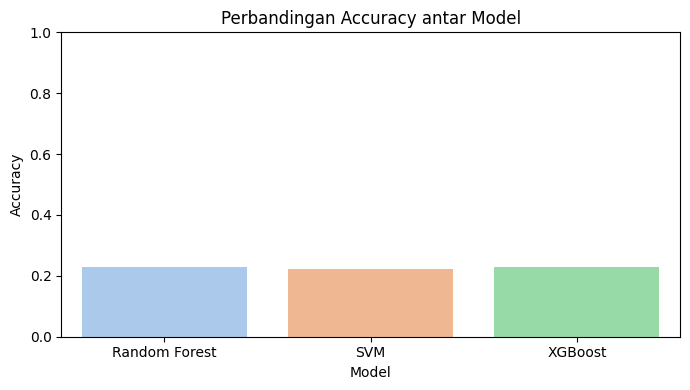

/tmp/ipython-input-4-3806146653.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="pastel")


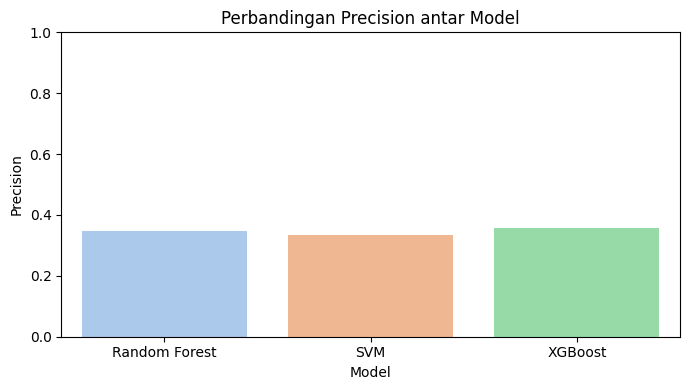

/tmp/ipython-input-4-3806146653.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="pastel")


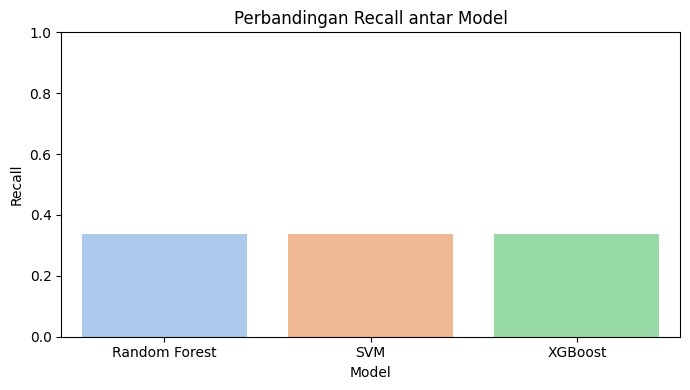

/tmp/ipython-input-4-3806146653.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="pastel")


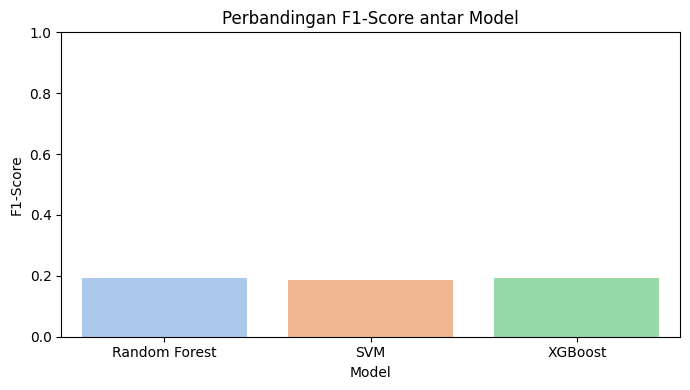

In [ ]:
# --- Hitung metrik evaluasi untuk ketiga model ---
def get_metrics(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='macro'),
        "Recall": recall_score(y_test, y_pred, average='macro'),
        "F1-Score": f1_score(y_test, y_pred, average='macro')
    }

# Kumpulkan semua metrik
results = []
results.append(get_metrics("Random Forest", rf_search.best_estimator_, X_test, y_test))
results.append(get_metrics("SVM", svm_search.best_estimator_, X_test, y_test))
results.append(get_metrics("XGBoost", xgb_search.best_estimator_, X_test, y_test))

# Convert ke DataFrame
results_df = pd.DataFrame(results)

# --- Plot Bar Chart ---
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

for metric in metrics:
    plt.figure(figsize=(7, 4))
    sns.barplot(x="Model", y=metric, data=results_df, palette="pastel")
    plt.title(f"Perbandingan {metric} antar Model")
    plt.ylim(0, 1)
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.tight_layout()
    plt.show()


In [ ]:
# Cetak tabel performa dari DataFrame sebelumnya
print(" Tabel Ringkasan Performa Model:")
print(results_df.set_index("Model").round(4))


 Tabel Ringkasan Performa Model:
               Accuracy  Precision  Recall  F1-Score
Model                                               
Random Forest    0.2285     0.3465  0.3382    0.1929
SVM              0.2241     0.3344  0.3385    0.1852
XGBoost          0.2285     0.3574  0.3363    0.1933



📊 Random Forest Evaluation
Accuracy : 0.22852081488042517
Precision: 0.34650290158903774
Recall   : 0.338191223778148
F1 Score : 0.1929384969430926

Classification Report:
              precision    recall  f1-score   support

       berat       0.22      0.11      0.15       225
      ringan       0.21      0.85      0.33       231
      sedang       0.62      0.05      0.10       673

    accuracy                           0.23      1129
   macro avg       0.35      0.34      0.19      1129
weighted avg       0.45      0.23      0.16      1129



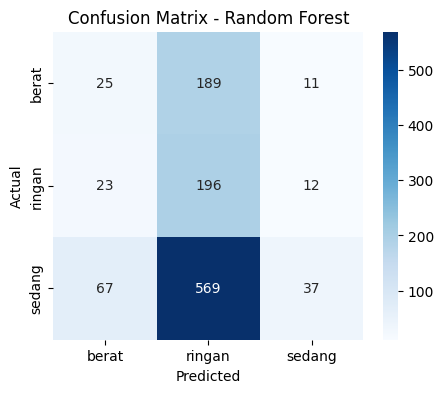


📊 SVM Evaluation
Accuracy : 0.2240921169176262
Precision: 0.33437559103418674
Recall   : 0.3385193904658987
F1 Score : 0.18518776261937334

Classification Report:
              precision    recall  f1-score   support

       berat       0.20      0.11      0.14       225
      ringan       0.21      0.87      0.34       231
      sedang       0.59      0.04      0.08       673

    accuracy                           0.22      1129
   macro avg       0.33      0.34      0.19      1129
weighted avg       0.44      0.22      0.14      1129



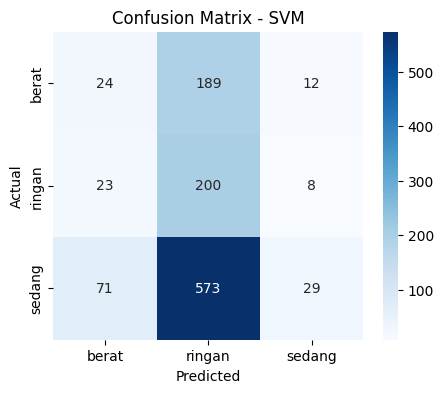


📊 XGBoost Evaluation
Accuracy : 0.22852081488042517
Precision: 0.3573514102251676
Recall   : 0.33629581029283856
F1 Score : 0.1932932022971485

Classification Report:
              precision    recall  f1-score   support

       berat       0.21      0.11      0.14       225
      ringan       0.20      0.84      0.33       231
      sedang       0.66      0.06      0.11       673

    accuracy                           0.23      1129
   macro avg       0.36      0.34      0.19      1129
weighted avg       0.48      0.23      0.16      1129



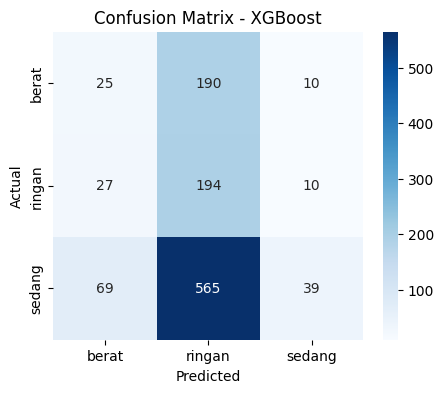

In [ ]:
# Evaluasi semua model yang sudah dioptimasi
evaluate_model("Random Forest", rf_search.best_estimator_, X_test, y_test)
evaluate_model("SVM", svm_search.best_estimator_, X_test, y_test)
evaluate_model("XGBoost", xgb_search.best_estimator_, X_test, y_test)
